In [1]:
# set the plotly renderer to svg
import plotly.io as pio
pio.renderers.default = "svg"

# 🤟 LLM-s for F1 Telemetry Data 🏎️

Disclaimer:
> This is my first LLM project, where I wanted to learn and explore the basics of LLMs. My strategy to learn is to build > small projects which can showcase the features of the newest and hottest tools. 

## Project Idea

The idea was fairly simple: I want to build a dashboard where the user can use natural language to get the telemetry data from two racers from a given event. The telemetry data is a time series data which is showing the speed, throttle, brake of the car. 
One of my most important criteria, that I want to use real data, and not some data generated or halucinated by the LLM. For this reason my strategy is to develop some custom tools which can be used to collect the publicly available telemetry data.

You can might ask the question, how is this better than just using some conventional dropdowns or radio buttons to filter the data. This is a good question, which I asked myself too 😀 Considering that the user uses natural language the definition of the prompt can be implicit like give me the `first` and the `fourth` best racer from a grand prix. The LLM can use some tools to find these drivers and then fetch the results. Or you can describe an event just by a country or city without specifying the event exactly. This gives the user much more flexibility and make the dashboard much more natural than just using dozens of buttons and dropdowns. But anyway the goal of the project to learn something new. 

## Telemetry data

The first thing was to get telemetry data. For this I used the fastf1 python library, which makes it simple to download telemetry data. First thing is to load a session, where only the year, event name and the session type need to be specified. 

```python

session = fastf1.get_session(2022, "Monaco Grand Prix", "Qualifying")
session.load()
```

In [2]:
import fastf1
from fastf1 import logger

logger.set_log_level("ERROR")

session = fastf1.get_session(2022, "Monaco Grand Prix", "Qualifying")
session.load()

After loading the session we can use all available data like lap times, results, telemetry data, etc.

The session object than can be used to retrieve telemetry data for specific drivers and laps.

```python

fastest_lap = session.laps.pick_drivers("VER").pick_fastest()
# add distance to the data
telemetry_data = fastest_lap.get_car_data().add_distance()
telemetry_data.head(2)
```


In [3]:
fastest_lap = session.laps.pick_drivers("VER").pick_fastest()
# add distance to the data
telemetry_data = fastest_lap.get_car_data().add_distance()
telemetry_data.head(2)

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-05-28 14:55:07.386,11096.0,279.0,7,100.0,False,12,car,0 days 00:00:00.085000,0 days 01:10:06.992000,6.587500
1,2022-05-28 14:55:07.586,11190.0,282.0,7,100.0,False,12,car,0 days 00:00:00.285000,0 days 01:10:07.192000,22.254167


This gives a pandas dataframe whith all the required information to plot the telemetry data.

## Colors

Another not that crucial but for me important detail was to be able to plot the data with the colors of the corresponding team color of the given driver. 
This information can be found with the fastf1 library too.

```python

driver = session.get_driver("VER")
team = driver["TeamName"]
color = fastf1.plotting.get_team_color(team, session=session)
```

In [4]:
from IPython.display import HTML

import fastf1.plotting

driver = session.get_driver("VER")
team = driver["TeamName"]
color = fastf1.plotting.get_team_color(team, session=session)

# Display the color as a square
html_code = f'<div style="width: 50px; height: 50px; background-color: {color};"></div>'
display(HTML(html_code))


Another detail is that the color in case of comparing a driver with another driver from the same team. In this case one of the drivers color will be inverted. This can be achived by the following code:

```python
def _invert_hex_color(hex_color: str) -> str:
    hex_color = hex_color.lstrip("#")
    inverted = "".join(f"{255 - int(hex_color[i:i+2], 16):02X}" for i in (0, 2, 4))
    return f"#{inverted}"
```

In [5]:
def _invert_hex_color(hex_color: str) -> str:
    hex_color = hex_color.lstrip("#")
    inverted = "".join(f"{255 - int(hex_color[i:i+2], 16):02X}" for i in (0, 2, 4))
    return f"#{inverted}"

In [6]:
# show both colors
html_code = f"""
<div style="display: flex; align-items: center;">
    <div style="width: 50px; height: 50px; background-color: {color};"></div>
    <div style="margin: 0 10px;">&#8594;</div>
    <div style="width: 50px; height: 50px; background-color: {_invert_hex_color(color)};"></div>
</div>
"""
display(HTML(html_code))

Putting everything together the telemetry will be plotted like this:

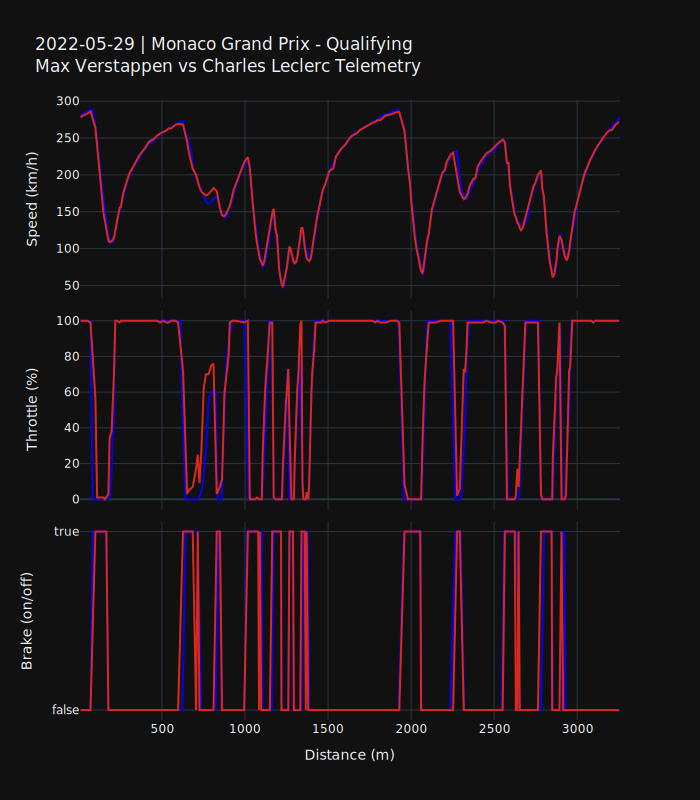

In [7]:
import sys
sys.path.append("..")
from src.visualization import plot_telemetry

plot_telemetry(
    driver_1="VER",
    driver_2="LEC",
    session=session,
)

The full code can be found the the github [repository](https://github.com/meszdav/f1-playground)

## Visualization

The first thing was to develop some functions to visualize the 

![demo](resources/screen_recording_0.gif)